## **1. Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

## **2. Data Understanding**

### Load Dataset

In [3]:
# Read data
ebola = pd.read_csv('ebola.csv', parse_dates=['Date'])

# First few rows
ebola.head()

,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0


Parameter 'parse_dates' bertujuan untuk memastikan bahwa kolom yang ditentukan ('Date') dibaca dan diubah secara otomatis menjadi tipe data datetime oleh pandas saat memuat data dari file CSV.

### Number of Rows and Columns

In [4]:
ebola.shape

(17585, 4)

Data ebola memiliki 17.585 baris dan 4 kolom.

### Data Information

In [5]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17585 entries, 0 to 17584
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Indicator  17585 non-null  object        
 1   Country    17585 non-null  object        
 2   Date       17585 non-null  datetime64[ns]
 3   value      17585 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 549.7+ KB


Tipe data sudah sesuai dengan value dari masing-masing kolom.

### Unique Values

In [6]:
# Count the number of unique values in 'Indicator' column
ebola['Indicator'].nunique()
print(f"Number of unique values in 'Indicator' column: {ebola['Indicator'].nunique()}")

print("------------------------------------------------")

# Unique values in 'Indicator' column
for i in ebola['Indicator'].unique():
    print(i)

Number of unique values in 'Indicator' column: 36
------------------------------------------------
Cumulative number of confirmed, probable and suspected Ebola cases
Cumulative number of confirmed Ebola cases
Cumulative number of probable Ebola cases
Cumulative number of suspected Ebola cases
Cumulative number of confirmed, probable and suspected Ebola deaths
Cumulative number of confirmed Ebola deaths
Cumulative number of probable Ebola deaths
Cumulative number of suspected Ebola deaths
Number of confirmed Ebola cases in the last 21 days
Number of confirmed, probable and suspected Ebola cases in the last 21 days
Number of probable Ebola cases in the last 21 days
Number of confirmed Ebola cases in the last 7 days
Number of probable Ebola cases in the last 7 days
Number of suspected Ebola cases in the last 7 days
Number of confirmed, probable and suspected Ebola cases in the last 7 days
Proportion of confirmed Ebola cases that are from the last 7 days
Proportion of probable Ebola cases 

### Values Count in 'Indicator' Column

In [7]:
ebola['Indicator'].value_counts()

Indicator
Cumulative number of confirmed, probable and suspected Ebola deaths                            2485
Cumulative number of confirmed Ebola cases                                                     2484
Cumulative number of confirmed, probable and suspected Ebola cases                             2477
Cumulative number of probable Ebola cases                                                      2436
Cumulative number of suspected Ebola cases                                                     2366
Cumulative number of confirmed Ebola deaths                                                    1648
Cumulative number of probable Ebola deaths                                                     1526
Cumulative number of suspected Ebola deaths                                                    1308
Number of confirmed Ebola cases in the last 21 days                                             190
Number of confirmed, probable and suspected Ebola cases in the last 21 days               

## **3. Data Preprocessing**

### Pivot Table

In [8]:
# Filter for relevant indicators
relevant_indicators = [
    'Cumulative number of confirmed Ebola cases',
    'Cumulative number of suspected Ebola cases',
    'Cumulative number of confirmed Ebola deaths',
    'Cumulative number of suspected Ebola deaths'
]

# Filter data based on the relevant indicators
ebola_pivot = ebola[ebola['Indicator'].isin(relevant_indicators)].reset_index(drop=True)

# Pivot table to wider format
ebola_pivot = ebola_pivot.pivot_table(values='value', index=['Country', 'Date'], columns='Indicator')

# Reset index for easier access
ebola_pivot = ebola_pivot.reset_index()

# Subselect and rearrange columns
ebola_pivot = ebola_pivot[['Country', 'Date',
                            'Cumulative number of suspected Ebola cases',
                            'Cumulative number of confirmed Ebola cases',
                            'Cumulative number of suspected Ebola deaths',
                            'Cumulative number of confirmed Ebola deaths']]

# Rename columns for easier analysis
ebola_pivot.columns = ['Country', 'Date', 'Suspected Cases', 'Confirmed Cases', 'Suspected Deaths', 'Confirmed Deaths']

# Sort the pivot table by the 'Date' column
ebola_pivot = ebola_pivot.sort_values(by='Date').reset_index(drop=True)

ebola_pivot.head()

,Country,Date,Suspected Cases,Confirmed Cases,Suspected Deaths,Confirmed Deaths
0,Guinea,2014-08-29,25.0,482.0,2.0,287.0
1,Nigeria,2014-08-29,3.0,15.0,0.0,6.0
2,Sierra Leone,2014-08-29,54.0,935.0,8.0,380.0
3,Liberia,2014-08-29,382.0,322.0,168.0,225.0
4,Guinea,2014-09-05,56.0,604.0,3.0,362.0


### Check Country Name

In [9]:
# Unique values in 'Country' column
for i in ebola_pivot['Country'].unique():
    print(i)

Guinea
Nigeria
Sierra Leone
Liberia
Senegal
United States of America
Spain
Mali
United Kingdom
Italy
Liberia 2
Guinea 2


In [10]:
# Replace values in 'Country' column
ebola_pivot['Country'] = ebola_pivot['Country'].replace(r'Liberia 2', 'Liberia', regex=True)
ebola_pivot['Country'] = ebola_pivot['Country'].replace(r'Guinea 2', 'Guinea', regex=True)

In [11]:
# Unique values in 'Country' column
for i in ebola_pivot['Country'].unique():
    print(i)

Guinea
Nigeria
Sierra Leone
Liberia
Senegal
United States of America
Spain
Mali
United Kingdom
Italy


### Check for Missing Values

In [12]:
# Check for missing values in the processed data
ebola_pivot.isnull().sum()

Country                0
Date                   0
Suspected Cases      118
Confirmed Cases        0
Suspected Deaths    1176
Confirmed Deaths     836
dtype: int64

In [13]:
# Handling missing values by filling with zero
ebola_pivot['Suspected Cases'].fillna(0, inplace=True)
ebola_pivot['Confirmed Cases'].fillna(0, inplace=True)
ebola_pivot['Suspected Deaths'].fillna(0, inplace=True)
ebola_pivot['Confirmed Deaths'].fillna(0, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26172\3077258550.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ebola_pivot['Suspected Cases'].fillna(0, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_26172\3077258550.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [14]:
# Recheck if there are still any missing values
ebola_pivot.isnull().sum()

Country             0
Date                0
Suspected Cases     0
Confirmed Cases     0
Suspected Deaths    0
Confirmed Deaths    0
dtype: int64

### Check for Duplicate Values

In [15]:
# Check for duplicate values in the processed data
ebola_pivot.duplicated().sum()

0

## **4. Exploratory Data Analysis (EDA)**

### Suspected Cases Statistic by Country

In [16]:
ebola_pivot.groupby('Country')['Suspected Cases'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Guinea,260.0,16.511538,25.415236,0.0,5.0,11.0,18.0,316.0
Italy,141.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Liberia,363.0,3338.933884,2425.288701,0.0,0.0,4224.0,5636.0,5636.0
Mali,243.0,0.004115,0.064150,0.0,0.0,0.0,0.0,1.0
Nigeria,255.0,0.039216,0.291668,0.0,0.0,0.0,0.0,3.0
Senegal,254.0,0.015748,0.177120,0.0,0.0,0.0,0.0,2.0
Sierra Leone,259.0,3450.795367,1433.495827,54.0,2512.0,3844.0,4600.0,5131.0
Spain,243.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
United Kingdom,221.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


Deskripsi dari data tersebut diambil dari data per suspected cases per hari.

### Confirmed Cases Statistic by Country

In [17]:
ebola_pivot.groupby('Country')['Confirmed Cases'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Guinea,260.0,2883.169231,701.996267,2.0,2662.5,3215.0,3336.0,3351.0
Italy,141.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Liberia,363.0,2117.730028,1431.513417,3.0,7.5,3150.0,3151.0,3153.0
Mali,243.0,6.823045,0.956472,1.0,7.0,7.0,7.0,7.0
Nigeria,255.0,18.980392,0.257960,15.0,19.0,19.0,19.0,19.0
Senegal,254.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Sierra Leone,259.0,7883.671815,1787.114320,935.0,8135.0,8614.0,8697.0,8704.0
Spain,243.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
United Kingdom,221.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


### Distribution of Confirmed Cases and Deaths by Country

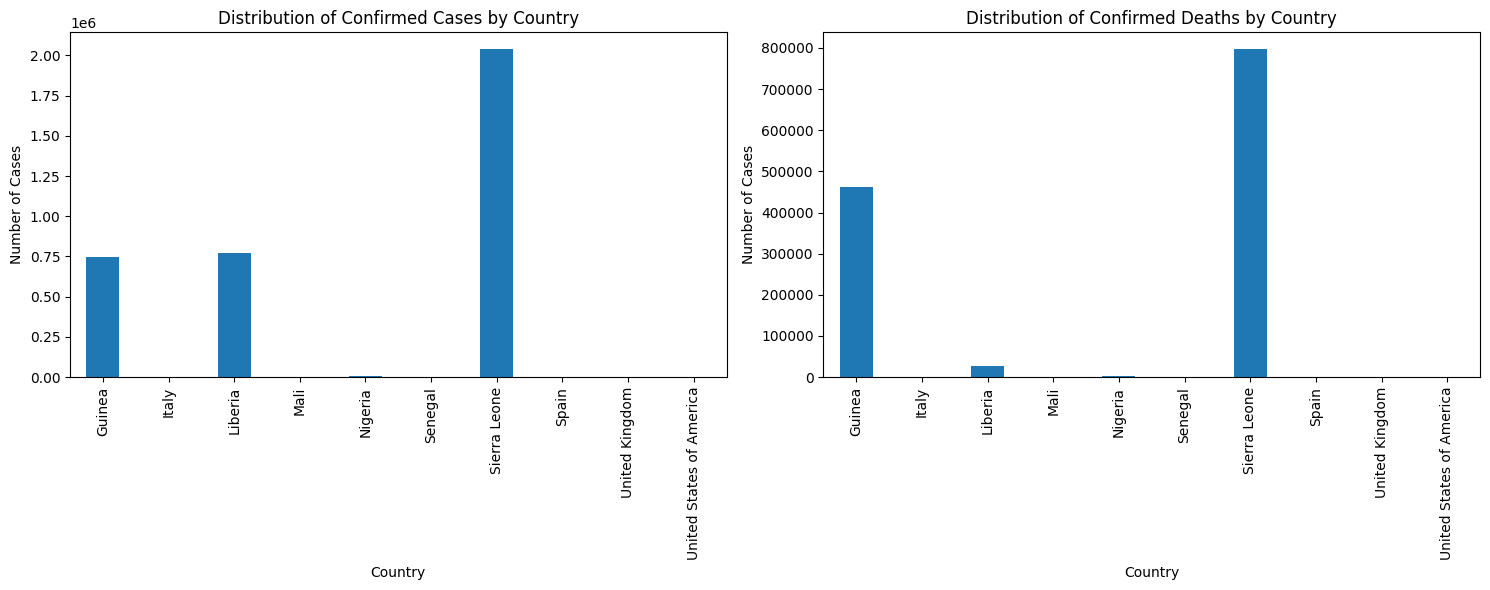

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ebola_pivot.groupby('Country')['Confirmed Cases'].sum().plot(kind='bar', ax=axes[0], title='Distribution of Confirmed Cases by Country')
ebola_pivot.groupby('Country')['Confirmed Deaths'].sum().plot(kind='bar', ax=axes[1], title='Distribution of Confirmed Deaths by Country')

axes[0].set_ylabel("Number of Cases")
axes[1].set_ylabel("Number of Cases")

plt.tight_layout()
plt.show()

### Month to Month Trends

In [19]:
# Extract 'Month' and 'Year' from 'Date' column
mtm = ebola_pivot
mtm['Month'] = mtm['Date'].dt.month_name()
mtm['Year'] = mtm['Date'].dt.year
mtm

,Country,Date,Suspected Cases,Confirmed Cases,Suspected Deaths,Confirmed Deaths,Month,Year
0,Guinea,2014-08-29,25.0,482.0,2.0,287.0,August,2014
1,Nigeria,2014-08-29,3.0,15.0,0.0,6.0,August,2014
2,Sierra Leone,2014-08-29,54.0,935.0,8.0,380.0,August,2014
3,Liberia,2014-08-29,382.0,322.0,168.0,225.0,August,2014
4,Guinea,2014-09-05,56.0,604.0,3.0,362.0,September,2014
...,...,...,...,...,...,...,...,...
2479,Liberia,2016-03-23,5636.0,3151.0,0.0,0.0,March,2016
2480,Italy,2016-03-23,0.0,1.0,0.0,0.0,March,2016
2481,Guinea,2016-03-23,0.0,2.0,0.0,1.0,March,2016
2482,Nigeria,2016-03-23,0.0,19.0,0.0,7.0,March,2016


In [20]:
# Filter data untuk negara Sierra Leone dan hanya kolom yang diperlukan
sierra_leone_data = mtm[mtm['Country'] == 'Sierra Leone'][['Date', 'Confirmed Deaths']]

# Tampilkan hasil
sierra_leone_data.

,Date,Confirmed Deaths
2,2014-08-29,380.0
8,2014-09-05,443.0
13,2014-09-08,461.0
16,2014-09-12,478.0
20,2014-09-16,514.0
...,...,...
2434,2015-12-17,3589.0
2445,2015-12-22,3589.0
2457,2015-12-23,3589.0
2466,2015-12-29,3589.0


In [21]:
# Tambahkan kolom nomor bulan agar pengurutan sesuai
mtm = ebola_pivot.copy()  # Pastikan menggunakan data asli yang belum tergrup
mtm['Month'] = mtm['Date'].dt.month
mtm['Year'] = mtm['Date'].dt.year

# Aggregate by 'Year' and 'Month'
mtm = mtm.groupby(['Year', 'Month'])[['Suspected Cases', 'Confirmed Cases', 'Suspected Deaths', 'Confirmed Deaths']].sum().reset_index()

# Buat kolom 'Month_Year' dalam format datetime
mtm['Month_Year'] = pd.to_datetime(mtm['Year'].astype(str) + '-' + mtm['Month'].astype(str) + '-01')

# Urutkan berdasarkan kolom 'Month_Year'
mtm = mtm.sort_values(by='Month_Year').reset_index(drop=True)

# Ubah kembali 'Month_Year' menjadi format string "Bulan Tahun" untuk tampilan akhir
mtm['Month_Year'] = mtm['Month_Year'].dt.strftime('%B %Y')

# Seleksi kolom yang diperlukan
mtm = mtm[['Month_Year', 'Suspected Cases', 'Confirmed Cases', 'Suspected Deaths', 'Confirmed Deaths']]
mtm


,Month_Year,Suspected Cases,Confirmed Cases,Suspected Deaths,Confirmed Deaths
0,August 2014,464.0,1754.0,178.0,898.0
1,September 2014,6493.0,24140.0,2651.0,12330.0
2,October 2014,20345.0,52974.0,3755.0,18002.0
3,November 2014,24434.0,62867.0,245.0,13723.0
4,December 2014,56255.0,144591.0,1281.0,39738.0
5,January 2015,115761.0,283317.0,3318.0,89395.0
6,February 2015,117248.0,252846.0,2844.0,99465.0
7,March 2015,125545.0,247796.0,2686.0,87035.0
8,April 2015,126913.0,223281.0,2370.0,81808.0
9,May 2015,194543.0,314463.0,3318.0,116170.0


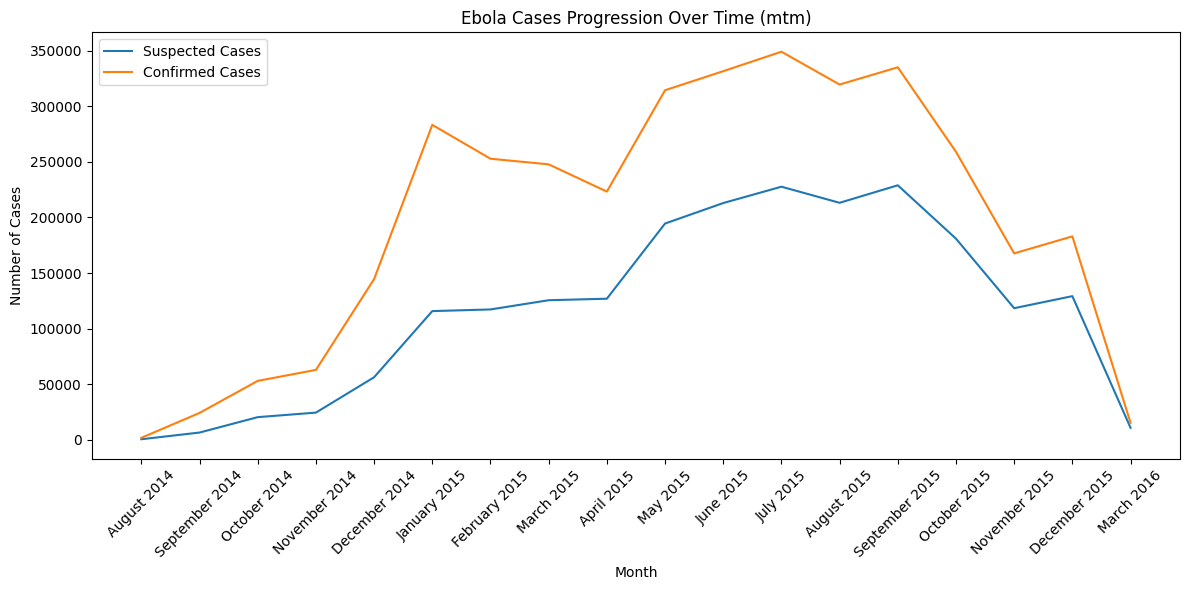

In [22]:
# Visualize ebola cases progression over time
plt.figure(figsize=(12, 6))

plt.plot(mtm['Month_Year'], mtm['Suspected Cases'], label='Suspected Cases')
plt.plot(mtm['Month_Year'], mtm['Confirmed Cases'], label='Confirmed Cases')

plt.title('Ebola Cases Progression Over Time (mtm)')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

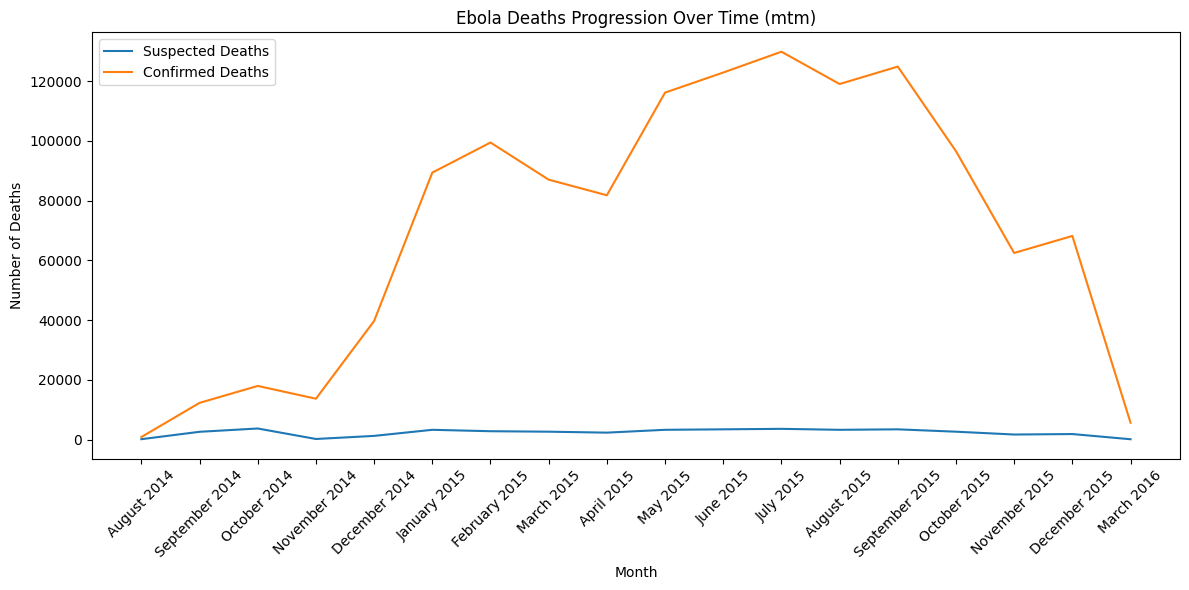

In [23]:
# Visualize ebola deaths progression over time
plt.figure(figsize=(12, 6))

plt.plot(mtm['Month_Year'], mtm['Suspected Deaths'], label='Suspected Deaths')
plt.plot(mtm['Month_Year'], mtm['Confirmed Deaths'], label='Confirmed Deaths')

plt.title('Ebola Deaths Progression Over Time (mtm)')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Year on Year Trends

In [24]:
# Extract 'Year' from 'Date' column
yoy = ebola_pivot
yoy['Year'] = yoy['Date'].dt.year
yoy

,Country,Date,Suspected Cases,Confirmed Cases,Suspected Deaths,Confirmed Deaths,Month,Year
0,Guinea,2014-08-29,25.0,482.0,2.0,287.0,August,2014
1,Nigeria,2014-08-29,3.0,15.0,0.0,6.0,August,2014
2,Sierra Leone,2014-08-29,54.0,935.0,8.0,380.0,August,2014
3,Liberia,2014-08-29,382.0,322.0,168.0,225.0,August,2014
4,Guinea,2014-09-05,56.0,604.0,3.0,362.0,September,2014
...,...,...,...,...,...,...,...,...
2479,Liberia,2016-03-23,5636.0,3151.0,0.0,0.0,March,2016
2480,Italy,2016-03-23,0.0,1.0,0.0,0.0,March,2016
2481,Guinea,2016-03-23,0.0,2.0,0.0,1.0,March,2016
2482,Nigeria,2016-03-23,0.0,19.0,0.0,7.0,March,2016


In [25]:
# Aggregate by 'Year'
yoy = ebola_pivot.groupby('Year')[['Suspected Cases', 'Confirmed Cases', 'Suspected Deaths', 'Confirmed Deaths']].sum().reset_index()
yoy

,Year,Suspected Cases,Confirmed Cases,Suspected Deaths,Confirmed Deaths
0,2014,107991.0,286326.0,8110.0,84691.0
1,2015,1991339.0,3266978.0,34764.0,1197804.0
2,2016,10767.0,15251.0,158.0,5684.0


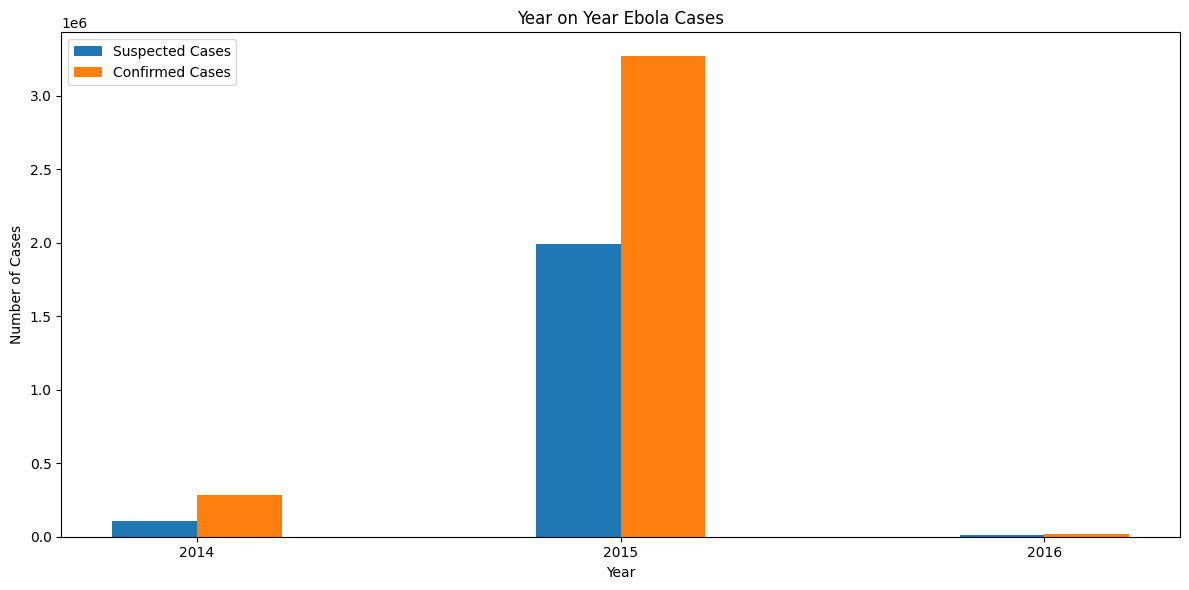

In [26]:
# Visualize ebola cases progression over time
bar_width = 0.2
x = np.arange(len(yoy['Year']))

plt.figure(figsize=(12, 6))

plt.bar(x - bar_width/2, yoy['Suspected Cases'], width=bar_width, label='Suspected Cases')
plt.bar(x + bar_width/2, yoy['Confirmed Cases'], width=bar_width, label='Confirmed Cases')

plt.title('Year on Year Ebola Cases')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks(x, yoy['Year'])
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

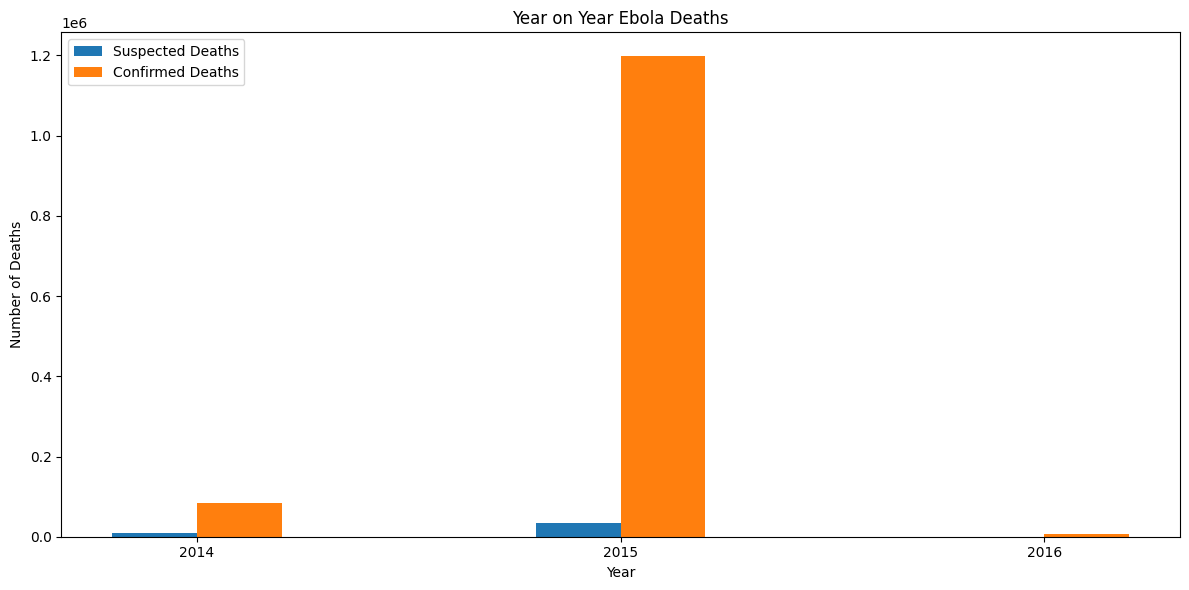

In [27]:
# Visualize ebola deaths progression over time
bar_width = 0.2
x = np.arange(len(yoy['Year']))

plt.figure(figsize=(12, 6))

plt.bar(x - bar_width/2, yoy['Suspected Deaths'], width=bar_width, label='Suspected Deaths')
plt.bar(x + bar_width/2, yoy['Confirmed Deaths'], width=bar_width, label='Confirmed Deaths')

plt.title('Year on Year Ebola Deaths')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.xticks(x, yoy['Year'])
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Top 10 Countries with the Highest Confirmed Ebola Deaths

In [28]:
# Aggregate total deaths by country and select the top 10
top_10_deaths = ebola_pivot.groupby('Country')['Confirmed Deaths'].sum().nlargest(10).reset_index()
top_10_deaths

,Country,Confirmed Deaths
0,Sierra Leone,797984.0
1,Guinea,461212.0
2,Liberia,26936.0
3,Nigeria,1784.0
4,United States of America,242.0
5,Mali,21.0
6,Italy,0.0
7,Senegal,0.0
8,Spain,0.0
9,United Kingdom,0.0


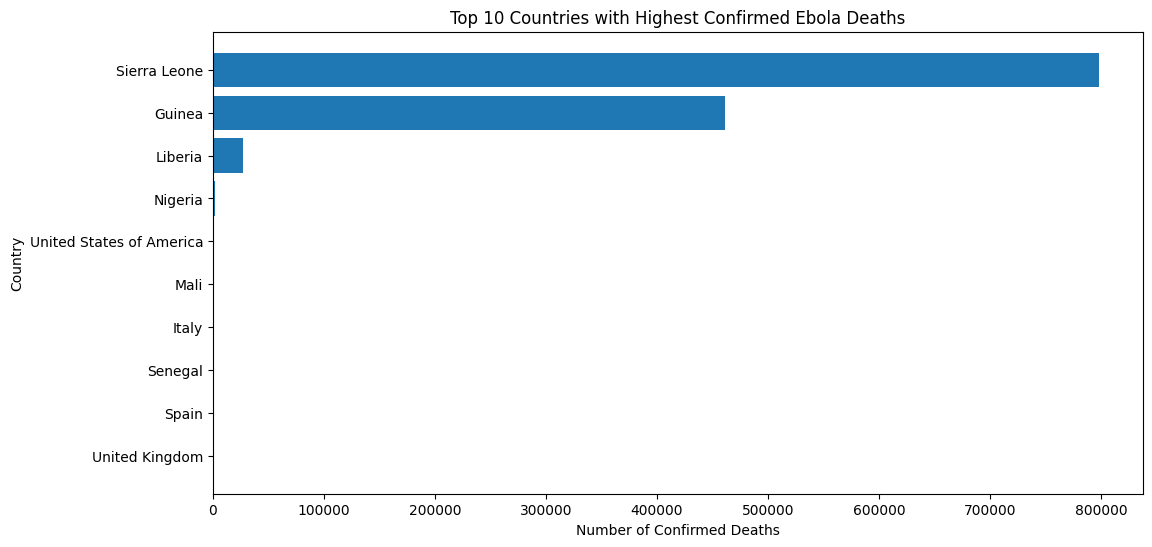

In [29]:
# Visualize the corrected top 10 countries by confirmed ebola deaths
plt.figure(figsize=(12, 6))

plt.barh(top_10_deaths['Country'], top_10_deaths['Confirmed Deaths'])

plt.xlabel('Number of Confirmed Deaths')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Confirmed Ebola Deaths')
plt.gca().invert_yaxis()

plt.show()

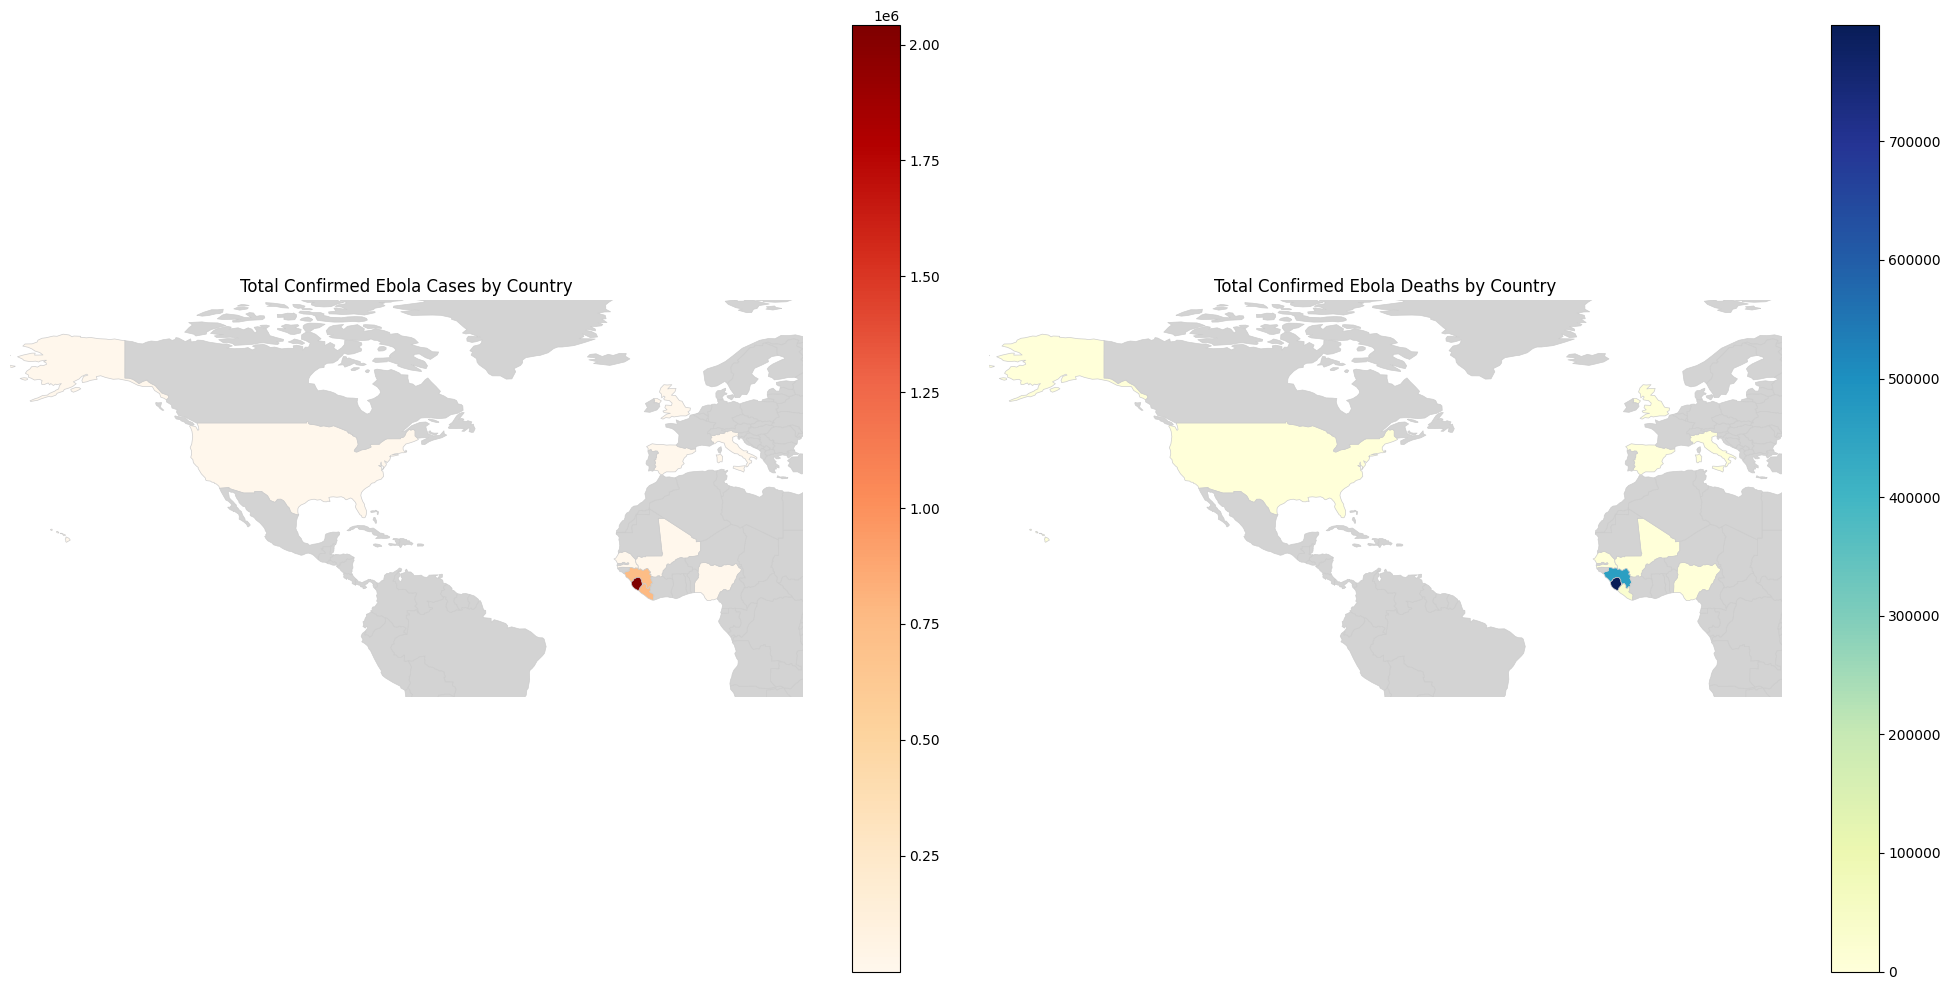

In [30]:
# Ganti path ini dengan lokasi file .shp yang telah Anda unduh dan ekstrak
shapefile_path = "C:/Users/User/OneDrive - Institut Teknologi Sepuluh Nopember/Dokumen/MATKUL SMSTR 3/Data Wragling/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"


# Baca data shapefile menggunakan geopandas
world = gpd.read_file(shapefile_path)

# Agregasi total confirmed cases dan confirmed deaths per country
ebola_aggregated = ebola_pivot.groupby('Country')[['Confirmed Cases', 'Confirmed Deaths']].sum().reset_index()

# Gabungkan data Ebola dengan data geometris negara berdasarkan nama negara
world = world.merge(ebola_aggregated, how='left', left_on='NAME', right_on='Country')

# Atur ukuran peta dan skala warna
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Tentukan bounding box (batas latitude dan longitude) untuk fokus pada wilayah Afrika Barat
xlim = (-170, 30)   # Longitude dari -20 hingga 15
ylim = (-20, 80)   # Latitude dari -10 hingga 15

# Plot map untuk Confirmed Cases dengan crop
world.plot(column='Confirmed Cases', cmap='OrRd', linewidth=0.5, ax=ax[0], edgecolor='0.8', legend=True,
            missing_kwds={'color': 'lightgrey', 'label': 'No data'})
ax[0].set_xlim(xlim)
ax[0].set_ylim(ylim)
ax[0].set_title('Total Confirmed Ebola Cases by Country')
ax[0].set_axis_off()

# Plot map untuk Confirmed Deaths dengan crop
world.plot(column='Confirmed Deaths', cmap='YlGnBu', linewidth=0.5, ax=ax[1], edgecolor='0.8', legend=True,
            missing_kwds={'color': 'lightgrey', 'label': 'No data'})
ax[1].set_xlim(xlim)
ax[1].set_ylim(ylim)
ax[1].set_title('Total Confirmed Ebola Deaths by Country')
ax[1].set_axis_off()

plt.tight_layout()
plt.show()


In [31]:
# Filter data untuk negara Sierra Leone dan hanya kolom yang diperlukan
sierra_leone_data = mtm[mtm['Country'] == 'Sierra Leone'][['Date', 'Confirmed Deaths']]

# Tampilkan hasil
sierra_leone_data

KeyError: 'Country'